# Moving Average

<Strong><a href="http://datagyani.in/index.php/2021/09/01/analyze-time-series-data/">HOW TO ANALYZE TIME SERIES DATA…</a></Strong>

In [1]:
#let's import all the neccessary libraries
import pandas as pd # data processing
import os #helps changing directory and locating your file

In [2]:
#changing directory
os.chdir('D:\\blog/Time Series')
os.getcwd()

'D:\\blog\\Time Series'

In [3]:
#reading the dataset
airline = pd.read_csv('airline.csv',index_col='Month',parse_dates=True)
#dropping NA if any in the dataset
airline.dropna(inplace=True)
#printing the  the first five column
airline.head()

,Passengers(in thousands)
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Simple Moving Average

In [4]:
airline['6-month-SMA'] = airline['Passengers(in thousands)'].rolling(window=6).mean()
airline.head(10)

,Passengers(in thousands),6-month-SMA
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,124.500000
1949-07-01,148,130.500000
1949-08-01,148,135.500000
1949-09-01,136,136.166667


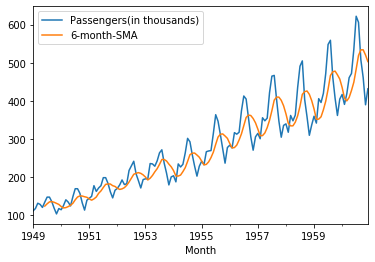

In [6]:
airline.plot()

We can observe the lag effect of SMA in the above chart. We will try to overcome that using EWMA.

# Exponential Weighted Moving Average

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter we provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}
 
* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.


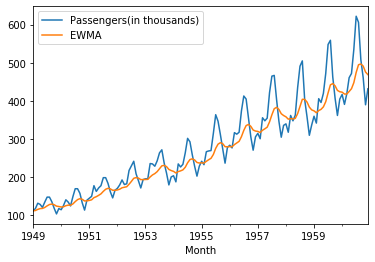

In [9]:
airline['EWMA'] = airline['Passengers(in thousands)'].ewm(span=12,adjust=False).mean()

airline[['Passengers(in thousands)','EWMA']].plot();